# Detecting artifacts in EEG time series

In [223]:
import os
import pandas as pd
import numpy as np
import mne
import bbtools as bbt

%matplotlib notebook

In [224]:
raw = bbt.read_csv("C:/Users/jadam/OneDrive/Escritorio/Feb-15-Javi-Visedo-Activity-No-Labels-BBT-E16-AAA005-2020-02-15_12-59-21/EEG.csv",
                   ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])
raw.crop(7, 80).load_data()  # just use a second

Creating RawArray with float64 data, n_channels=16, n_times=30832
    Range : 0 ... 30831 =      0.000 ...   120.434 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'Iz', 'F10', 'Fpz', 'AF7', 'PO6', 'FCz', 'POz', 'FT10', 'TP10', 'P4', 'F9', 'AF6', 'C5', 'P8', 'AF3', 'A2', 'FC6', 'F2', 'T10', 'P6', 'O10', 'P2', 'AF5', 'FC4', 'O9', 'FC3', 'FC1', 'PO2', 'FC2', 'F1', 'CP5', 'AF4', 'F8', 'Oz', 'PO9', 'T6', 'P1', 'PO3', 'AF9', 'AF2', 'T8', 'T3', 'FT9', 'PO10', 'AFz', 'PO8', 'AF1', 'T7', 'T4', 'PO1', 'FC5', 'AF8', 'TP9', 'TP8', 'M1', 'P9', 'M2', 'CP6', 'PO4', 'AF10', 'FT8', 'C6', 'P3', 'T5', 'A1', 'FT7', 'TP7', 'F7', 'PO5', 'P5', 'F5', 'T9', 'Fz', 'PO7', 'CPz', 'P7', 'F6', 'P10'}


<RawArray  |  None, n_channels x n_times : 16 x 18689 (73.0 sec), ~2.3 MB, data loaded>

<IPython.core.display.Javascript object>


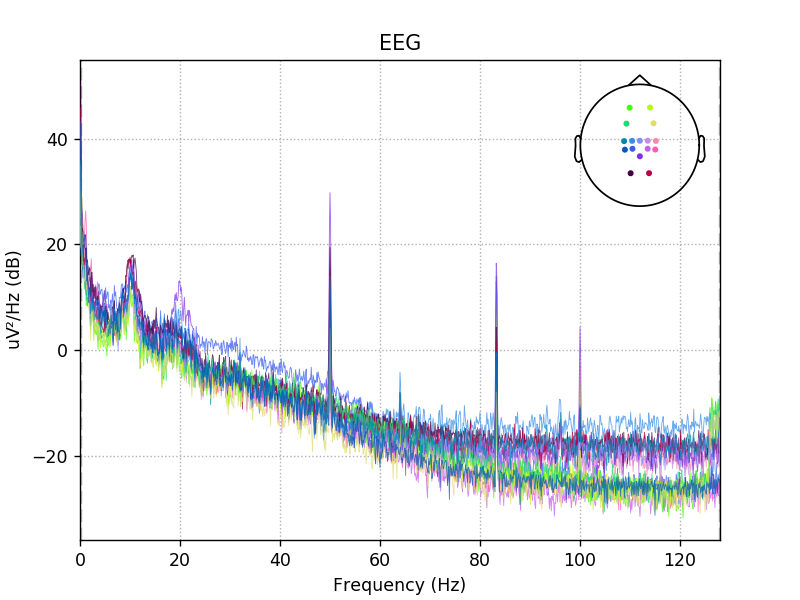

Effective window size : 8.000 (s)
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 100.00 Hz: -6.02, -6.02 dB



<IPython.core.display.Javascript object>


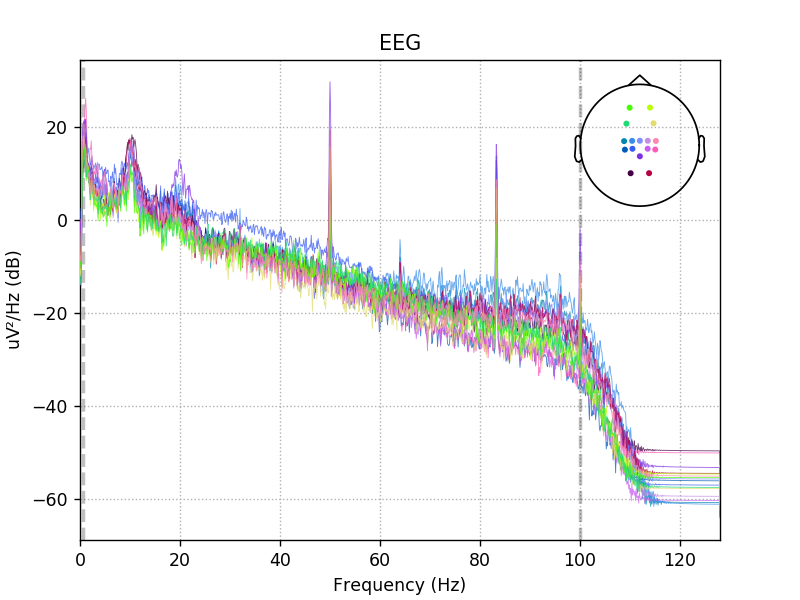

Effective window size : 8.000 (s)


<IPython.core.display.Javascript object>


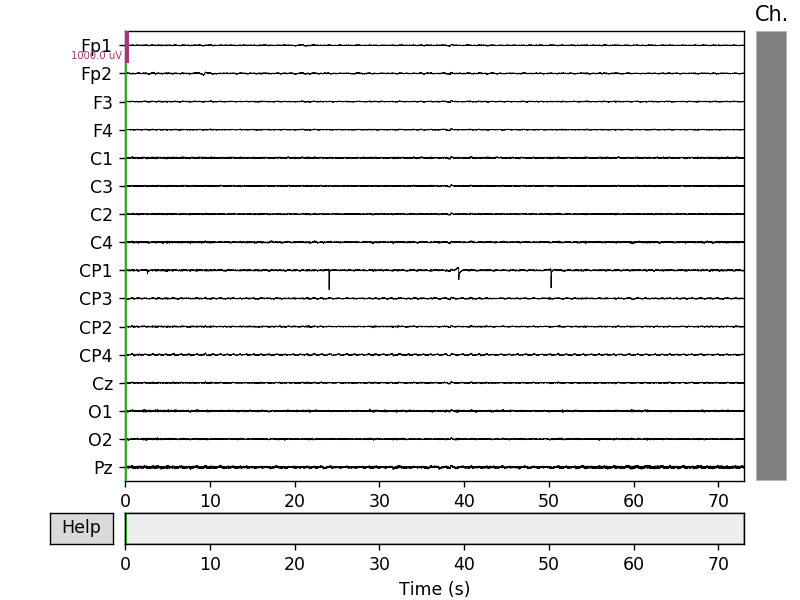

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)



<IPython.core.display.Javascript object>


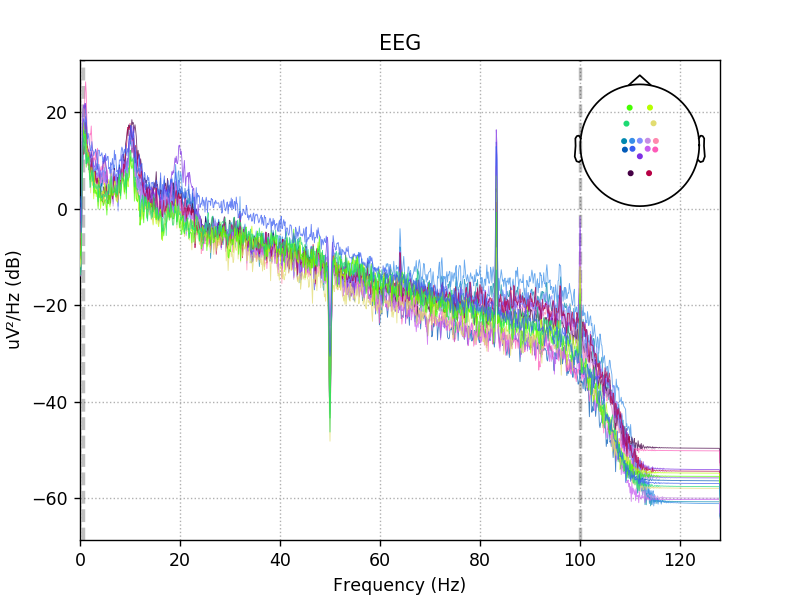

Effective window size : 8.000 (s)


<IPython.core.display.Javascript object>


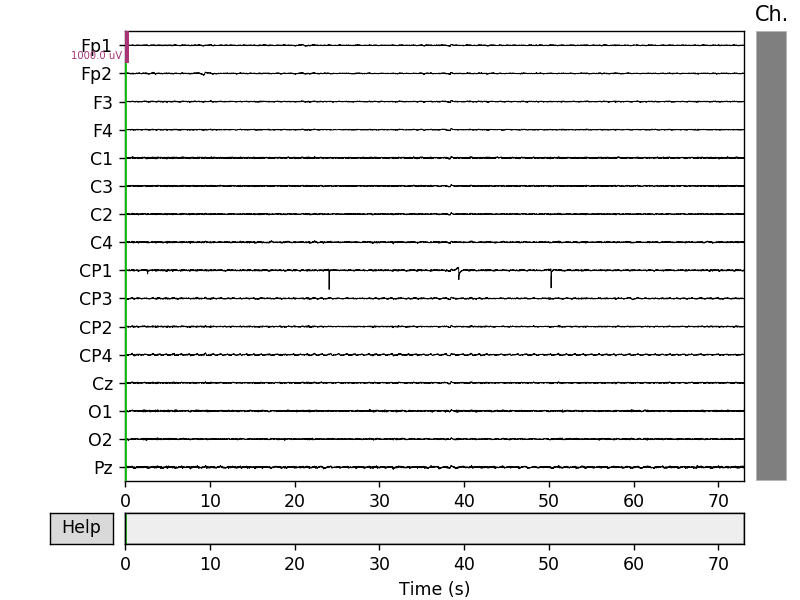

<RawArray  |  None, n_channels x n_times : 16 x 18689 (73.0 sec), ~2.3 MB, data loaded>

In [225]:
bbt.high_low_filter_notches(raw, fmin = 0.5, fmax = 100, fnotch = 50.)

In [226]:
#Drop non-frontal channels
non_frontal_channels = ['C1', 'C2', 'C3', 'C4', 'CP1', 'CP2', 'CP3', 'CP4', 'O1', 'O2', 'Cz', 'Pz']
raw = raw.drop_channels(non_frontal_channels)

<IPython.core.display.Javascript object>


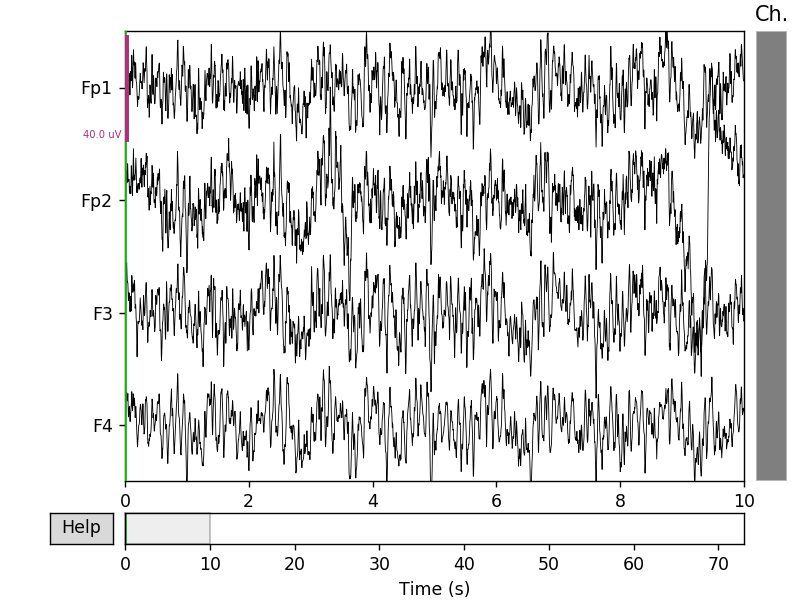

In [227]:
plot_fig = raw.plot()

Now let's identify blinks

In [228]:
#now we find average and peak values, plus others, calculated with numpy
signal_average=(np.average(raw[0][0])+np.average(raw[1][0])+np.average(raw[2][0])+np.average(raw[3][0]))/4
average_max_signal=(np.amax(raw[0][0])+np.amax(raw[1][0])+np.amax(raw[2][0])+np.amax(raw[3][0]))/4
average_min_signal=(np.amin(raw[0][0])+np.amin(raw[1][0])+np.amin(raw[2][0])+np.amin(raw[3][0]))/4
signal_range = average_max_signal-average_min_signal 
middle_signal=(average_max_signal+average_min_signal)/2
average_max_signal

4.486412614466573e-05

In [229]:
# if max eeg value is over 1.3e-4 we will consider this a blink and send a blink signal to the game 
if (average_max_signal >= 1e-5):
    print ("blink")

blink
